In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display 

In [3]:
#load data
full_data=pd.read_csv('data.csv')

In [4]:
display(full_data.head())


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
#removing unused column
full_data=full_data.drop('Unnamed: 32',axis=1)

In [8]:
#separate id
id_data=full_data['id']
labels=full_data['diagnosis']

#class distribution
labels.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [9]:
data=full_data.drop('id',axis=1)


diagnosis
B    [[AxesSubplot(0.125,0.779333;0.125x0.100667), ...
M    [[AxesSubplot(0.125,0.779333;0.125x0.100667), ...
dtype: object

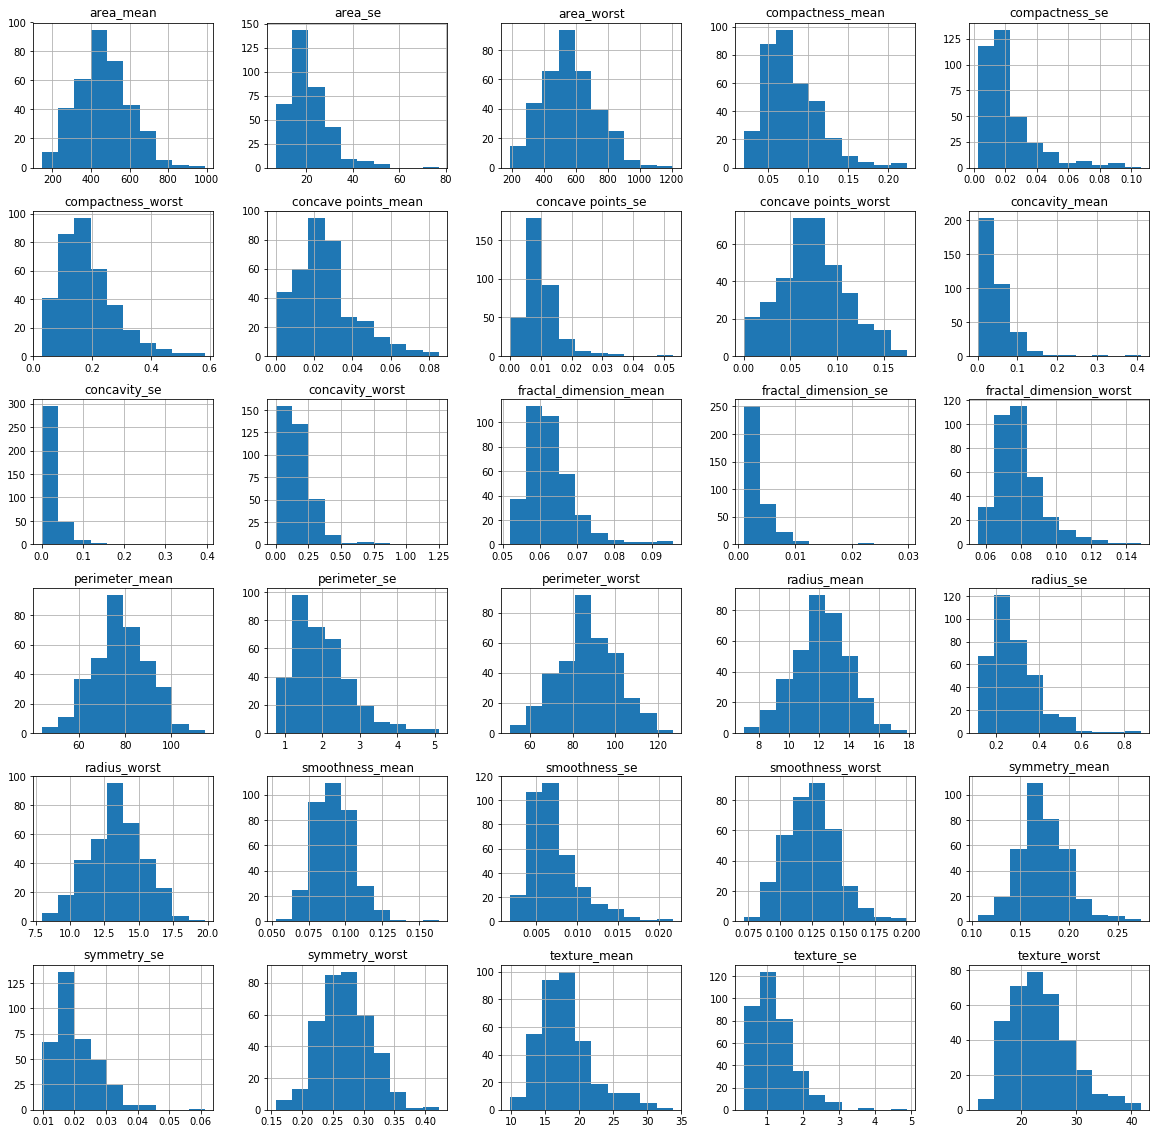

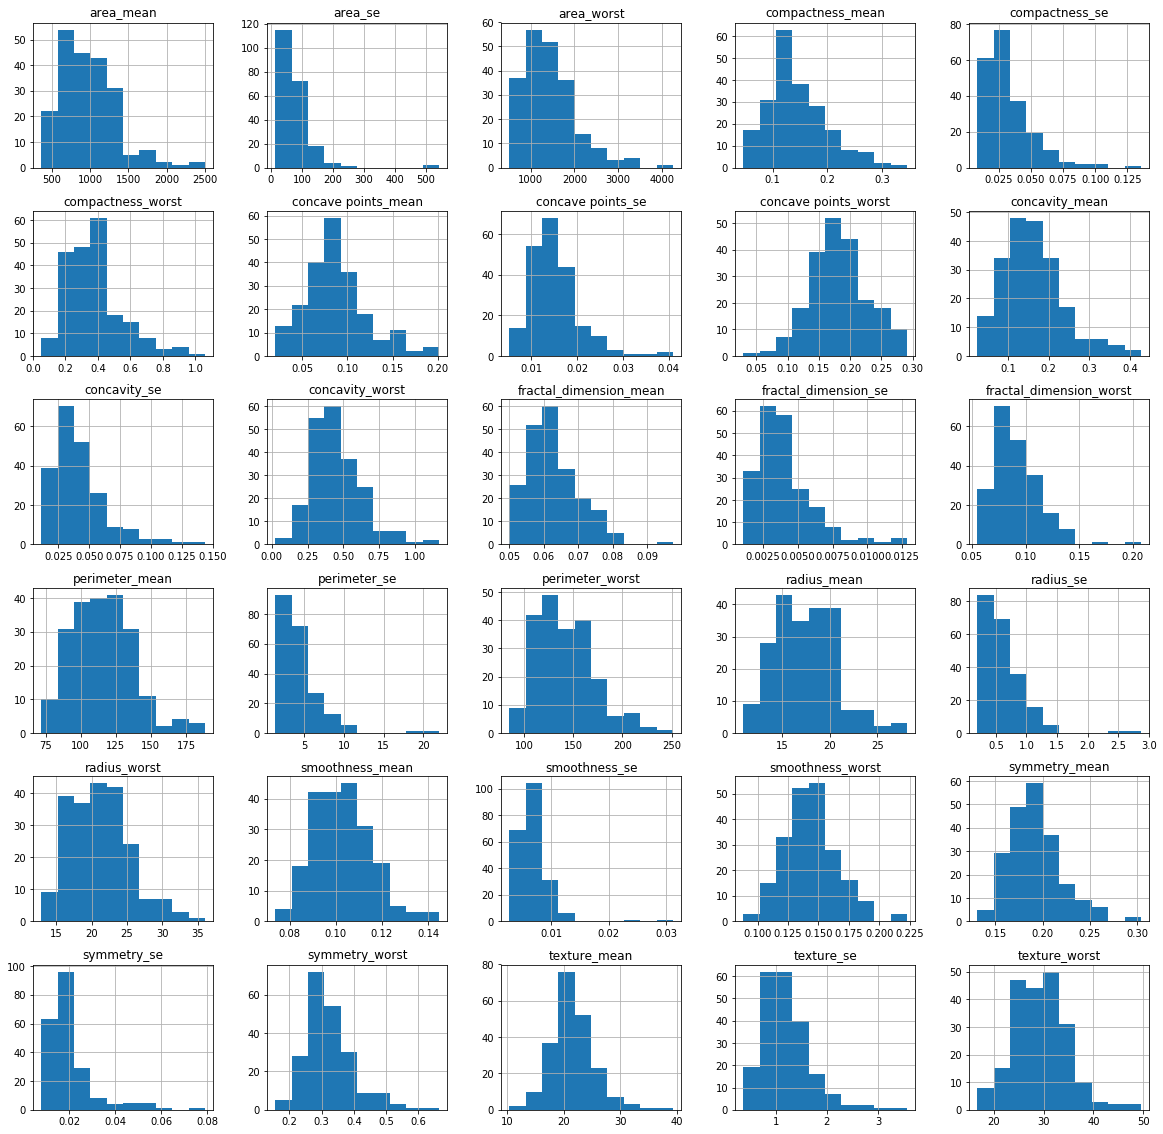

In [11]:
#visualize feature distributions by diagnosis
data.groupby('diagnosis').hist(figsize = (20, 20))


In [13]:
data = data.drop('diagnosis', axis=1)
labels = labels.map({'B': 0, 'M': 1})
display(data.head())

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
#scaling data
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()
scaled_data=scaler.fit_transform(data)

<function matplotlib.pyplot.show(*args, **kw)>

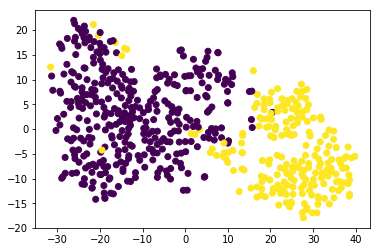

In [16]:
#distribution
from sklearn.manifold import TSNE
tsne = TSNE(init='pca')
tsne_vis = tsne.fit_transform(scaled_data)
plt.scatter(tsne_vis[:,0], tsne_vis[:,1], c=labels)
plt.show

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer

#make scorer to evaluate classifiers
f1_scorer = make_scorer(f1_score, pos_label = 0)

In [18]:
#split train and test
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = .15, random_state=133)


In [22]:
#explore classifier performance

xtratrees = ExtraTreesClassifier()
decisiontree = DecisionTreeClassifier()
randomforest = RandomForestClassifier()

print ("For decision tree benchmark:")
dtscores = cross_val_score(decisiontree, data, labels, scoring = f1_scorer)
print (dtscores)
print (dtscores.mean())

print ("For random forest:")
rfscores = cross_val_score(randomforest, data, labels, scoring = f1_scorer)
print (rfscores)
print (rfscores.mean())

print ("For extra tree classifier:")
scores = cross_val_score(xtratrees, data, labels, scoring = f1_scorer)
print (scores)
print (scores.mean())

For decision tree benchmark:
[0.91983122 0.95901639 0.90990991]
0.929585842327075
For random forest:
[0.94650206 0.96694215 0.94915254]
0.9541989162487935
For extra tree classifier:
[0.95041322 0.97942387 0.97478992]
0.9682090024732132


In [23]:
#benchmark confusion matrix
from sklearn.metrics import confusion_matrix
dt_predict = decisiontree.fit(X_train, y_train).predict(X_test)
confusion_matrix(y_test, dt_predict)

array([[54,  4],
       [ 1, 27]])

In [26]:
#F1 benchmark
predictions = np.zeros(data.shape[0])
print ("f1 score is {:.4f}".format(f1_score(labels, predictions, pos_label = 0)))

f1 score is 0.7711


In [28]:
from sklearn.svm import SVC
svc=SVC()
svcscores = cross_val_score(svc, data, labels, scoring = f1_scorer)
print (svcscores)
print (svcscores.mean())

[0.77022654 0.77022654 0.77272727]
0.7710601157203097


In [29]:
from sklearn.model_selection import GridSearchCV


In [30]:
#Selecting the best hyperparameters
parameters = [{'n_estimators': np.arange(10,150,10), 'max_features': np.arange(5,30,5), 
                 'min_samples_split': np.arange(2, 8, 2)}]

In [31]:

extratreetune = ExtraTreesClassifier()
randtreetune = RandomForestClassifier()
xtra_grid = GridSearchCV(extratreetune, parameters, scoring = f1_scorer)
rand_grid = GridSearchCV(randtreetune, parameters, scoring = f1_scorer)


In [32]:
xtra_grid = xtra_grid.fit(X_train, y_train)
rand_grid = rand_grid.fit(X_train, y_train)


In [36]:
extratreetune = xtra_grid.best_estimator_
randtreetune = rand_grid.best_estimator_


In [39]:
from sklearn.feature_selection import SelectFromModel

In [46]:
sfm1 = SelectFromModel(extratreetune)
sfm2 = SelectFromModel(randtreetune)

In [47]:
sfm1.fit_transform(X_train, y_train)
sfm2.fit_transform(X_train, y_train)

array([[9.601e-02, 1.631e+01, 1.064e+02, 8.272e+02, 1.986e-01],
       [9.170e-02, 2.646e+01, 1.770e+02, 2.215e+03, 2.095e-01],
       [2.179e-02, 1.305e+01, 8.509e+01, 5.229e+02, 8.263e-02],
       ...,
       [1.389e-01, 2.545e+01, 1.661e+02, 2.027e+03, 2.216e-01],
       [7.017e-02, 2.499e+01, 1.588e+02, 1.956e+03, 1.860e-01],
       [8.994e-02, 2.614e+01, 1.701e+02, 2.145e+03, 2.091e-01]])

In [48]:
print ("f1 training score for tuned extremely randomized forest model is {:.4f}".format(f1_score(y_train, extratreetune.predict(X_train), pos_label = 0)))
print ("f1 training score for tuned random forest model is {:.4f}".format(f1_score(y_train, randtreetune.predict(X_train), pos_label = 0)))

f1 training score for tuned extremely randomized forest model is 1.0000
f1 training score for tuned random forest model is 0.9983


In [49]:

print ("f1 testing score for tuned extremely randomized forest model is {:.4f}".format(f1_score(y_test, extratreetune.predict(X_test), pos_label = 0)))
print ("f1 testing score for tuned random forest model is {:.4f}".format(f1_score(y_test, randtreetune.predict(X_test), pos_label = 0)))

f1 testing score for tuned extremely randomized forest model is 0.9828
f1 testing score for tuned random forest model is 0.9828
